In [15]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.models import Sequential
from keras.layers import Dense, Dropout, MaxPooling1D, Flatten, Conv1D, LSTM, CuDNNLSTM, Bidirectional

Randomly generate training data  
`train_x` has shape: (# of training data, max length of sequence, 4),
where the maximal length of sequence by default is 1000 and 4 reflects the one-hot encoding of one nucleotide(A, T, G, or C).

In [30]:
train_x = np.random.randint(2, size = 100*4000).reshape((100, 1000, 4))
train_y = np.random.randint(2, size = 100).reshape((100, 1))

Sanity check: overfit this small random dataset.

In [31]:
model = Sequential()
model.add(Conv1D(filters = 320, 
                 kernel_size = 26, 
                 padding = 'valid',
                 data_format = 'channels_last',
                 activation = 'relu'))
model.add(MaxPooling1D(pool_size = 13, strides = 13))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(8), input_shape=(1000, 8)))
model.add(Dropout(0.5))
model.add(Dense(925, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_x, train_y, epochs=30, batch_size=10, validation_split=0.1)

Train on 90 samples, validate on 10 samples
Epoch 1/30
90/90 [==============================] - 3s 37ms/step - loss: 0.7181 - acc: 0.4556 - val_loss: 0.6888 - val_acc: 0.6000
Epoch 2/30
90/90 [==============================] - 1s 7ms/step - loss: 0.6981 - acc: 0.4444 - val_loss: 0.6842 - val_acc: 0.6000
Epoch 3/30
90/90 [==============================] - 1s 7ms/step - loss: 0.7113 - acc: 0.4778 - val_loss: 0.6891 - val_acc: 0.6000
Epoch 4/30
90/90 [==============================] - 1s 7ms/step - loss: 0.6940 - acc: 0.5222 - val_loss: 0.6837 - val_acc: 0.6000
Epoch 5/30
90/90 [==============================] - 1s 7ms/step - loss: 0.7101 - acc: 0.4667 - val_loss: 0.6944 - val_acc: 0.4000
Epoch 6/30
90/90 [==============================] - 1s 7ms/step - loss: 0.6982 - acc: 0.4778 - val_loss: 0.7103 - val_acc: 0.4000
Epoch 7/30
90/90 [==============================] - 1s 7ms/step - loss: 0.6987 - acc: 0.4667 - val_loss: 0.6937 - val_acc: 0.4000
Epoch 8/30
90/90 [===========================

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 975, 320)          33600     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 75, 320)           0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 75, 320)           0         
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 16)                21056     
_________________________________________________________________
dropout_25 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 925)               15725     
_________________________________________________________________
dense_46 (Dense)             (None, 100)               92600     
__________

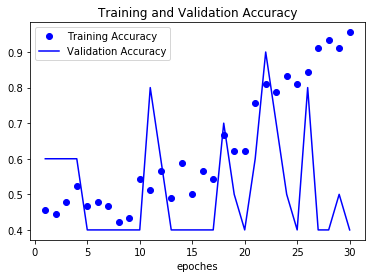

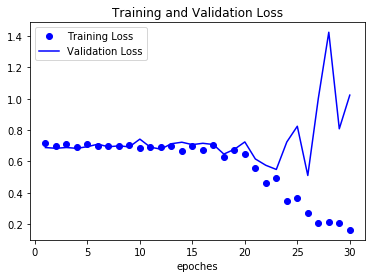

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('epoches')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('epoches')
plt.legend()

plt.show()